## Tips Dataset 

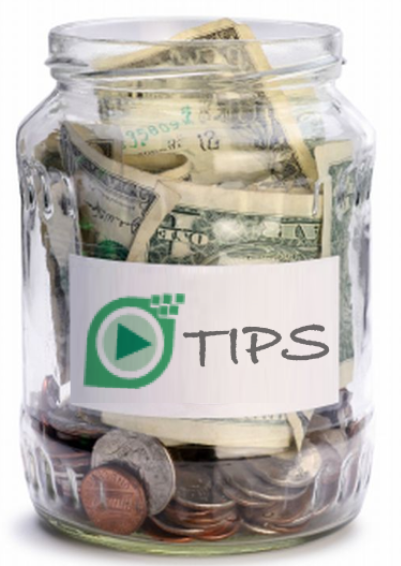

![](https://rdcnewscdn.realtor.com/wp-content/uploads/2016/06/tip-jar-1024x576.jpg)

#### Python Data Analysis Library
https://pandas.pydata.org/

The pandas website.

#### Seaborn Tutorials
https://seaborn.pydata.org/tutorial

The seaborn website.

**Matplotlib Tutorial – A Complete Guide to Python Plot w/ Examples**

https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/

The Matplotlib tutorial website.

**Visualizing the distribution of a dataset**

https://seaborn.pydata.org/examples/index.html

The seaborn website.

**Plotting with categorical data**

https://seaborn.pydata.org/tutorial/categorical.html#showing-multiple-relationships-with-facets

The seaborn website.

**The Tips dataset**

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv

Github website

### About the dataset

A waiter in one restaurant recorded information about each tip he received over a period of a few months. He collected several variables:
- the total bill in USD
- tip in USD
- sex of the bill payer
- whether there were smokers in the party
- day of the week
- time of day
- size of the party.

Below I will briefly analyze the dataset and check the relationship between different variables.

### Loading data

In [2]:
#Import Pandas (Data Structure Library which structure data in columns and rows)
import pandas as pd

# Import numerical library 'Numpy' to perform mathemtical operations 
import numpy as np

# Import metplotlib library to buil plots
import matplotlib.pyplot as plt

#Import Statistical plotting library 'Seaborn' to create more advanced plot visualizations
import seaborn as sns

In [5]:
# Load the Tips dataset from the link and check the column headers
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Check the number of rows in the dataset
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


- The data contains both numbers (total bill, tips, size) and the strings (sex, smoker, day, time). 
- There are 244 rercords in the dataset

In [7]:
# Check the mean, standard deviation, min and max amount and the distribution in the intervals of 25%, 50%, 75% for the numerical data

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
# Show number of males and females that are smokers/non-smokers

df = pd.DataFrame(dict(df))
df.groupby('smoker')['sex'].value_counts()

smoker  sex   
No      Male      97
        Female    54
Yes     Male      60
        Female    33
Name: sex, dtype: int64

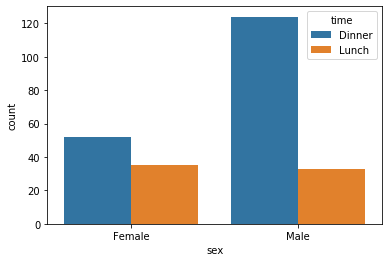

In [9]:
# Show the number of males and females during Lunch vs Dinner

g = sns.countplot(x="sex", hue="time", data=df)

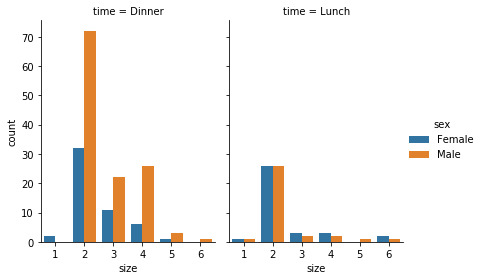

In [10]:
# Show the female and male customers attending differnt party sizes at different times

g = sns.catplot(x="size", hue="sex", col="time",
                    data=df, kind="count",
                    height=4, aspect=.7);

- The most popular 2-people groups are represented equally between male and female guests during lunch but there are more than twice more men than women during dinner in that group
- The 3- and 4-people groups are next most popular sizes
- There are no single-group males attending the Dinners

### Total bill and tip analysis

#### Tips

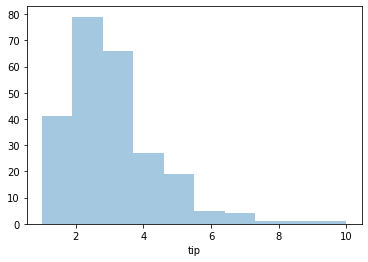

In [11]:
# Show the tip distribution on the histogram and boxplot

sns.distplot(df['tip'], kde=False, bins=10)

- The histogram is skewed right.  
- On the right side there are a few samples of tips which are higher than the majority (between 7 and 10 USD).
- Nearly 75% of the tips are below 3.50 USD while around 54-55 people left tips betweem 3.50 and 7.00 USD.   

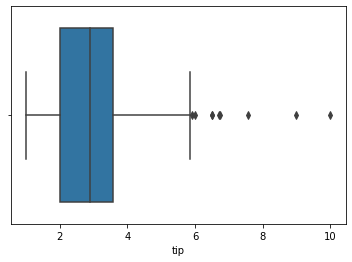

In [14]:
sns.boxplot(x="tip", data=df)

- The most tips are in the range from 2.00 to less than 4.00 USD. 
- The mean is at around 3.00 USD. 
- There are 7 samples of tips (outliers) above 6 USD.

#### Total bill

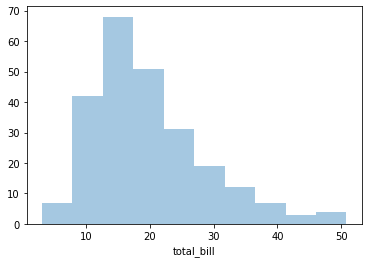

In [19]:
# Show the total bill distribution on the histogram and boxplot

sns.distplot(df['total_bill'], kde=False, bins=10);

- The total bill histogram is skewed right.
- On the right side there are a few samples where total bill was higher than 30USD.
- Most of the bills are up to 30 USD 
- The central tendency of the bill amount is in the range from 13.00 to 18.00 USD.

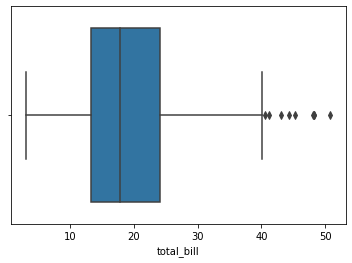

In [20]:
sns.boxplot(x="total_bill", data=df)

- The most bill amounts are in the range from around 13.00 to 24.00 USD. 
- The mean is at just under 20 USD. 
- There are seven bills that are worth above 40.00 USD.

#### Linear analysis of total bill to the tip

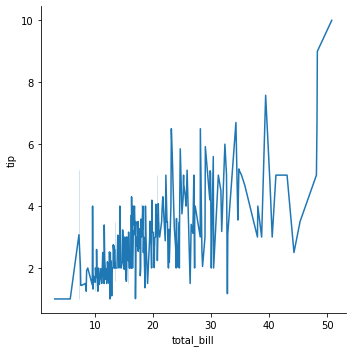

In [24]:
# Show linear analysis of total bill and tip 

sns.relplot(x="total_bill", y="tip", kind="line", data=df)

- The tip amount can go up and down 
- There is no strong correlation between total bill amount and the tip amount.

#### Scatterplot analysis of total bill to the tip

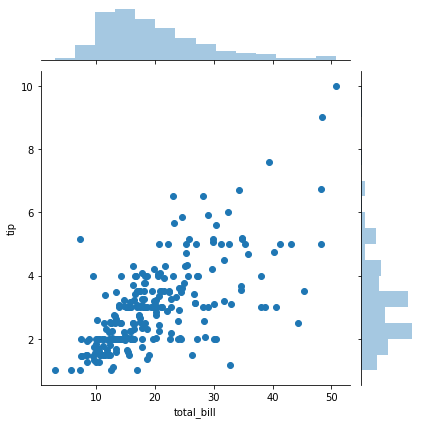

In [20]:
sns.jointplot(x="total_bill", y="tip", data=df)

- This plot also confirms that the tip amount does not necessarily depends on the total bill amount.
- There is tendency of tip growing with the total bill amount but the correlation is very low

#### Kernel density estimation analysis

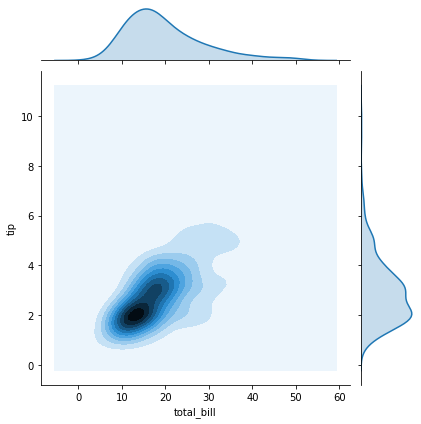

In [86]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="kde")

- The kernel density estimation indicates the highest density of total bill and the tip amount.


### Analysis of relationships between other variables  

**The subset of data to analyze:**

    1. Impact of time, day, smoking category on total bill
    2. Impact of time, sex, smoking category on total bill
    3. Impact of time, day, smoking category on tip
    4. Impact of time, sex, smoking category on tip
    5. Impact of time, day, group size on tip
    6. Portion of bills paid by women/men depending on the day
    7. Summary of numerical data based on females
    8. Summary of numberical data based on males
    9. Impact of day on total bill
    10. Impact of day on tip
    11. The relationships between columns with numerical variables using histograms and scatter plots

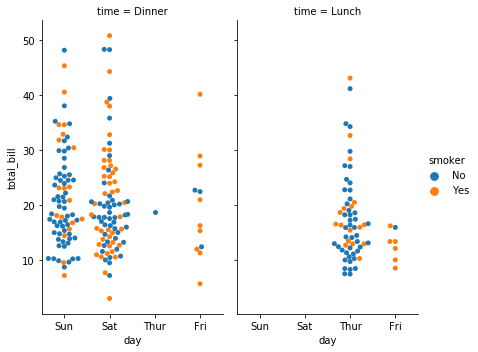

In [23]:
#  1. Impact of time, day, smoking category on total bill

sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=df);

- On Thursday the most popular meal is lunch, with the majority of guests non-smokers and the cost of most bills between 10 and 20 USD. 
- On Saturday and Sunday there are only dinners served 
- On Saturday the majority of bills are in the range from 10 to 30 USD and guests are predominantly smokers
- During Sunday's dinner, the guests are predominantly non-smokers (possibly more families coming over for lunch). 

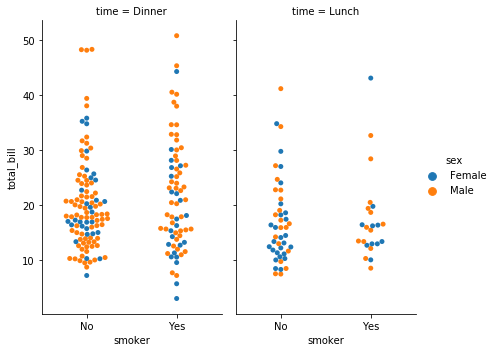

In [26]:
# Impact of time, sex, smoking category on total bill

sns.catplot(x="smoker", y="total_bill", hue="sex",
            col="time", aspect=.6,
            kind="swarm", data=df);

- At the weekend the highest bill payers are males
- Females pay more often for lunches on Thursdays and Fridays
- Males are more often smokers than woman 
- There are more non-smokers than smokers


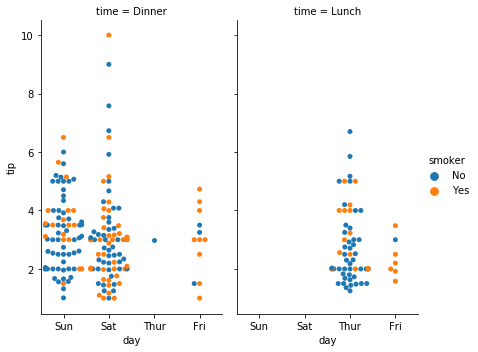

In [66]:
# Impact of time, day, smoking category on tip

sns.catplot(x="day", y="tip", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=df);

- Smokers and non-smokers both attend meals on all of the 4 days and give tips 
- More guests are non-smokers
- On Friday majority of guests are smokers (for both lunch and dinner). The tipps by this group is not higher than 5 USD.
- Tips are not corelated with the smoking status.

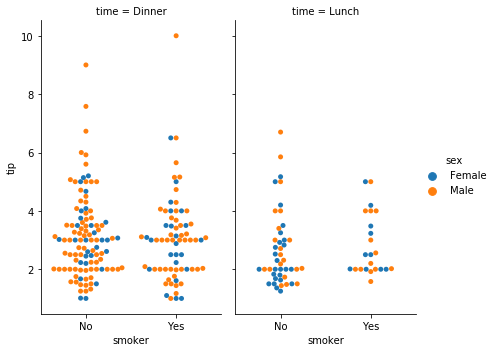

In [30]:
# Impact of time, sex, smoking category on tip

sns.catplot(x="smoker", y="tip", hue="sex",
            col="time", aspect=.6,
            kind="swarm", data=df);

- The tip amount range is not as wide as the total bill range. 
- The tips are higher and more common during dinner than lunch. 
- Non smokers are more common to leave tips.
- As highlighted earlier, male guests are more commonly paying for the bills and accordinly they more often leave tips than the female countrparts

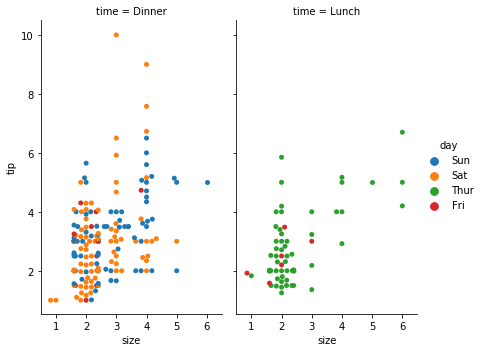

In [34]:
# Impact of time, day and group size on tip

sns.catplot(x="size", y="tip", hue="day",
            col="time", aspect=.6,
            kind="swarm", data=df);

- The groups of 2 are the most popular size groups
- Tipping durinng lunchtime is at smaller scale and has lower value. 
- The group size during lunch impacts the tips - the group of 4+ guests gave tips over 3.00 USD and more
- At dinner time the tipping for group of 4 is not less than 2.00 USD. 
- There is a weak correlation between the group size and tipping
- The individual guests have tendency to leave low tips (below 2USD). 

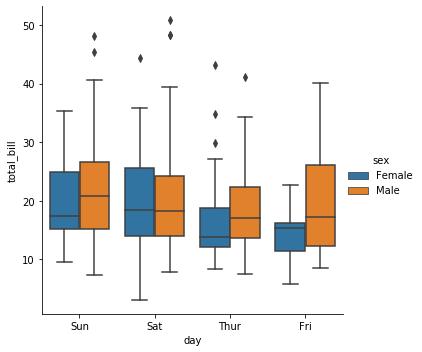

In [25]:
# Portion of bills paid by women/men depending on the day

sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=df);

- Male guests pay more bills
- Male guests pay higher bills than female guests
- Females spend the least money on Friday
- On Saturday both male and female guests spend on average the same amount on the bill

In [83]:
# Summary of numerical data for female guests

(df.loc[df.loc[:, 'sex'] == 'Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


In [84]:
# Summary of numerical data for male guests

(df.loc[df.loc[:, 'sex'] == 'Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


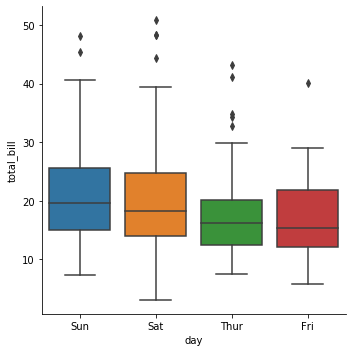

In [23]:
# Impact of day on total bill

sns.catplot(x="day", y="total_bill", kind="box", data=df)

- Thursday is the day where the total bill cost is the lowest but as we progress to the weekend, the bill cost increase.
- The highest bills are paid on Saturday and Sunday
- The bill value range is similar on Satuday and Sunday
- A few outliers can be notices on each day

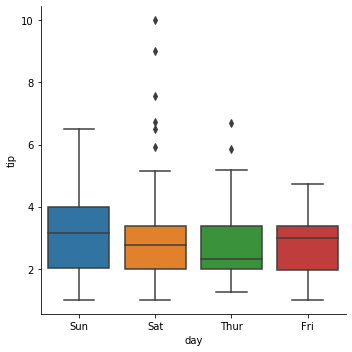

In [24]:
# Analyze if the day has impact on tips

sns.catplot(x="day", y="tip", kind="box", data=df)

- Tips remain at similar level from Thursday to Saturday 
- The median is shifting slightly on each day.
- The noticable increse in the tips range is recorded on Sunday.
- The outliers are only recorded on Saturday and Thursday

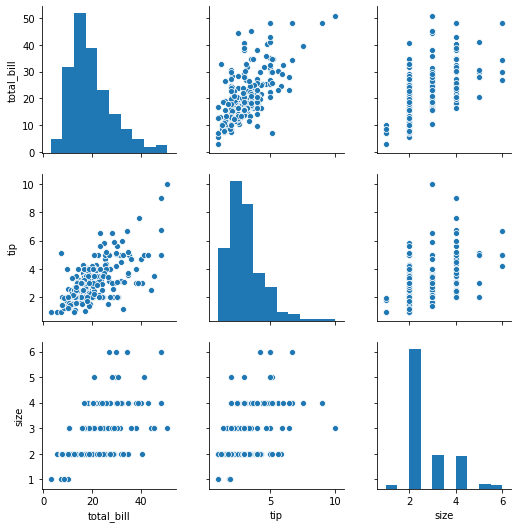

In [52]:
# The relationships between columns with numerical variables using histograms and scatter plots

x = sns.pairplot(df)

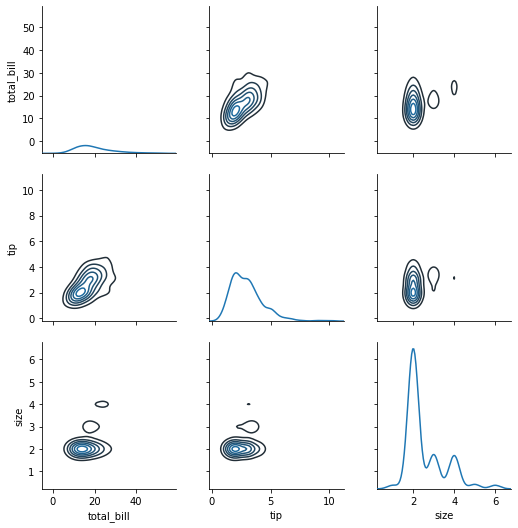

In [16]:
# The relationships between columns with numerical variables using kernel density estimation and linear function

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)